## 소비분석 데이터 분석
- 예측된 문화예술활동 횟수에 따른 feature의 빈도를 토대로 소비분석

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# # 경고 메세지 무시하기
# import warnings
# warnings.filterwarnings('ignore')

## 데이터 로드
- NaN 값은 해당 문화예술활동에 참여하지 않은 사람
- 0은 해당 무료 활동에 참여한 사람

In [4]:
CA_raw = pd.read_csv('./data/소비분석.csv')

In [5]:
CA_raw.head()
CA_raw.info()
CA_raw.shape

,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
0,1,3,6,2,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,3,5,2,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1,4,6,2,3,3,NaN,NaN,NaN,NaN,NaN,30000.0,NaN,30000
3,2,4,6,2,4,3,40000.0,0.0,50000.0,NaN,NaN,20000.0,NaN,110000
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53597 entries, 0 to 53596
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                53597 non-null  int64  
 1   education          53597 non-null  int64  
 2   income             53597 non-null  int64  
 3   married            53597 non-null  int64  
 4   work               53597 non-null  int64  
 5   age                53597 non-null  int64  
 6   exhibition_price   4380 non-null   float64
 7   museum_price       5918 non-null   float64
 8   art_price          7349 non-null   float64
 9   traditional_price  18772 non-null  float64
 10  theater_price      9533 non-null   float64
 11  movie_price        22395 non-null  float64
 12  performance_price  4727 non-null   float64
 13  total_price        53597 non-null  int64  
dtypes: float64(7), int64(7)
memory usage: 5.7 MB


(53597, 14)

In [6]:
CA = CA_raw.copy()

In [7]:
CS_pred_raw = pd.read_csv('./data/CS_pred.csv')

In [8]:
CS_pred_raw.head()
CS_pred_raw.info()
CS_pred_raw.shape

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,sex,age,education,married,work,income,sido,disabled,pred,target
0,49,0,0,0,5,0,1,1,14,14,...,2,5,3,1,5,3,1,1,3,3
1,3,3,3,0,1,0,2,6,14,9,...,2,5,3,2,5,7,1,1,1,1
2,22,15,0,0,0,0,2,2,14,14,...,2,5,4,3,1,5,1,1,2,2
3,10,0,0,0,2,2,2,4,17,11,...,1,5,4,2,1,6,1,1,2,2
4,7,0,0,0,0,0,3,2,15,12,...,2,5,3,2,1,5,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       2144 non-null   int64
 1   where_cnt      2144 non-null   int64
 2   attend_cnt     2144 non-null   int64
 3   volunteer_cnt  2144 non-null   int64
 4   history_cnt    2144 non-null   int64
 5   festival_cnt   2144 non-null   int64
 6   standard       2144 non-null   int64
 7   block          2144 non-null   int64
 8   expense        2144 non-null   int64
 9   expense_f      2144 non-null   int64
 10  difficulty     2144 non-null   int64
 11  intention      2144 non-null   int64
 12  history        2144 non-null   int64
 13  history_f      2144 non-null   int64
 14  festival       2144 non-null   int64
 15  festival_f     2144 non-null   int64
 16  sex            2144 non-null   int64
 17  age            2144 non-null   int64
 18  education      2144 non-null   int64
 19  marrie

(2144, 26)

## 데이터 전처리 - 소비분석 데이터

### 문화예술 활동에 전혀 참여하지 않은 사람 제외

In [9]:
CA.dropna(subset=['exhibition_price', 'museum_price', 'art_price', 'traditional_price', 'theater_price', 'movie_price', 'performance_price'],
          how='all',
          axis=0,
          inplace=True,
         )

In [10]:
CA.head()
CA.shape

,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
2,1,4,6,2,3,3,NaN,NaN,NaN,NaN,NaN,30000.0,NaN,30000
3,2,4,6,2,4,3,40000.0,0.0,50000.0,NaN,NaN,20000.0,NaN,110000
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
8,1,3,6,2,1,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
9,2,3,6,2,1,5,NaN,NaN,NaN,NaN,20000.0,20000.0,NaN,40000


(38287, 14)

### 50~60대인 사람만 선택

In [11]:
CA = CA[(CA['age'] == 5) | (CA['age'] == 6)]

In [12]:
CA.head()
CA.shape

,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
8,1,3,6,2,1,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
9,2,3,6,2,1,5,NaN,NaN,NaN,NaN,20000.0,20000.0,NaN,40000
10,1,3,5,3,1,5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
19,2,3,5,2,1,5,0.0,NaN,NaN,NaN,NaN,10000.0,NaN,10000


(11997, 14)

## 데이터 전처리 - 문화예술활동 조사 데이터

### 열 선택
- 국민문화예술활동 데이터와 소비분석 데이터가 겹치는 부분만 선택

In [13]:
CS_pred = CS_pred_raw[['sex', 'education', 'income', 'married', 'work', 'target', 'pred']]

In [14]:
CS_pred.head()

,sex,education,income,married,work,target,pred
0,2,3,3,1,5,3,3
1,2,3,7,2,5,1,1
2,2,4,5,3,1,2,2
3,1,4,6,2,1,2,2
4,2,3,5,2,1,1,1


### 문화예술활동에 적게/많이 참여하는 사람들의 특징 도출

[Text(0.5, 1.0, 'sex')]

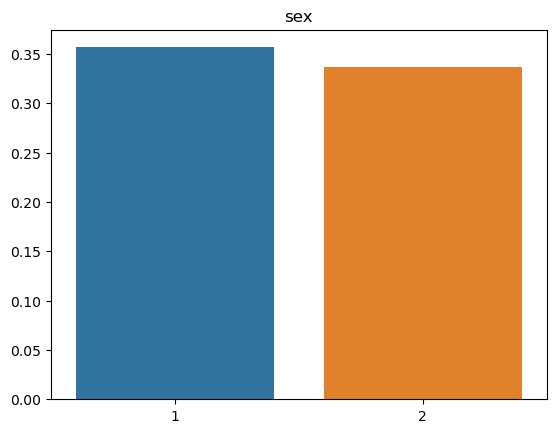

[Text(0.5, 1.0, 'education')]

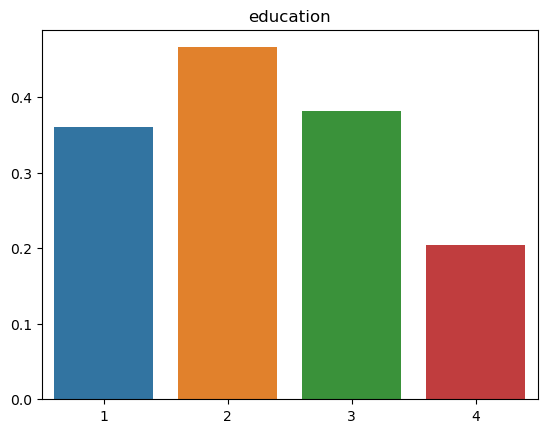

[Text(0.5, 1.0, 'income')]

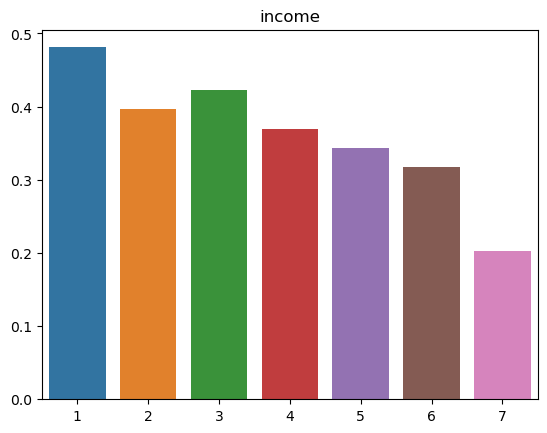

[Text(0.5, 1.0, 'married')]

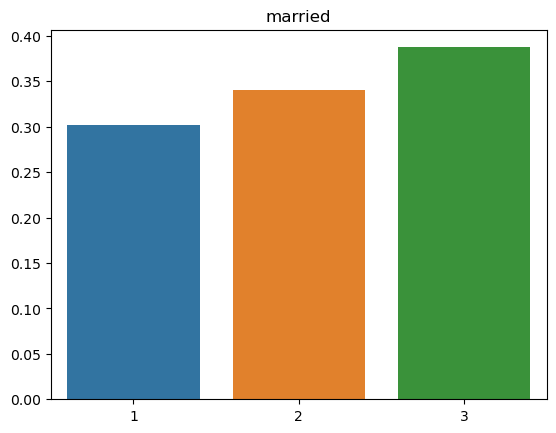

[Text(0.5, 1.0, 'work')]

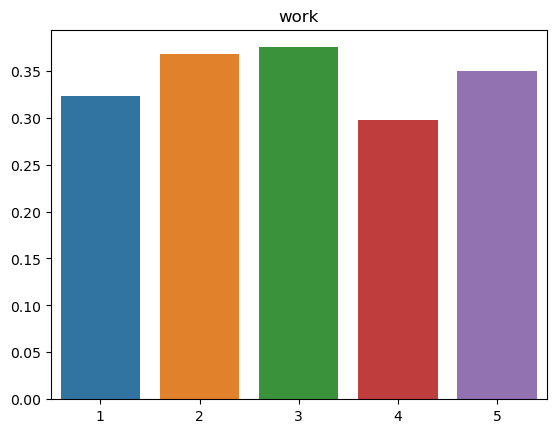

In [15]:
# 문화예술활동에 적게 참여하는 사람들의 특징 시각화
data = CS_pred[CS_pred['target'] == 1]

for i, column in enumerate(data.columns[:-2]):
    vc = data[column].value_counts()/CS_pred[column].value_counts()
    sns.barplot(x = vc.index,
                y = vc.values,
               ).set(title=column)
    plt.show()
    
# 문화예술활동에 적게 참여하는 사람들은 저소득층이 많다.

[Text(0.5, 1.0, 'sex')]

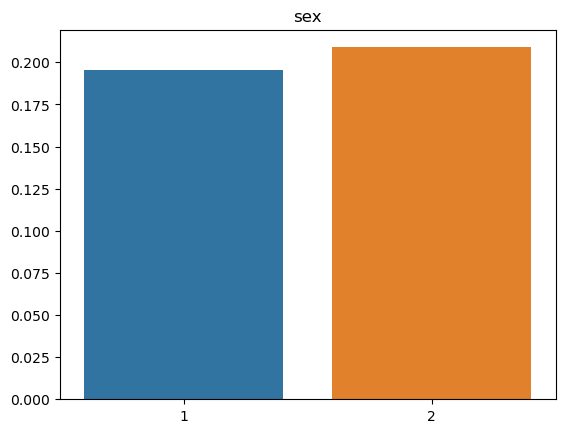

[Text(0.5, 1.0, 'education')]

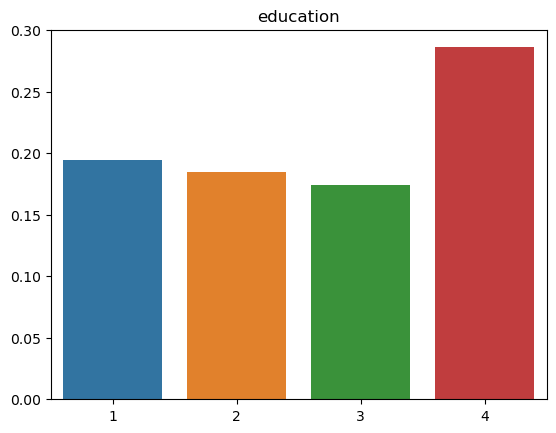

[Text(0.5, 1.0, 'income')]

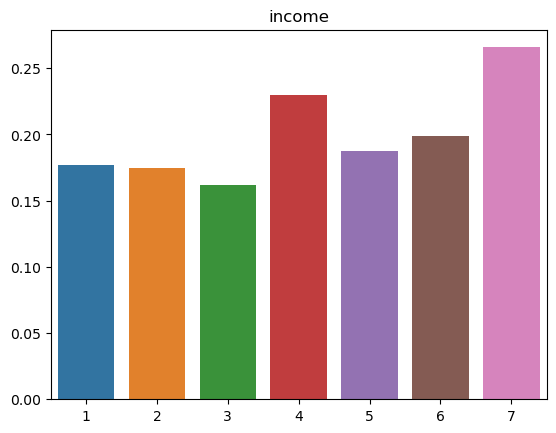

[Text(0.5, 1.0, 'married')]

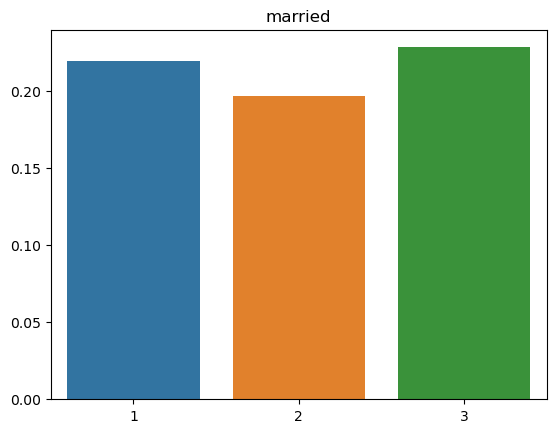

[Text(0.5, 1.0, 'work')]

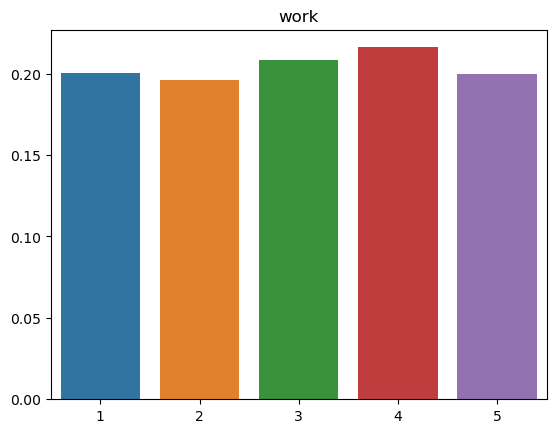

In [16]:
# 문화예술활동에 많이 참여하는 사람들의 특징 시각화
data = CS_pred[CS_pred['target'] == 3]

for i, column in enumerate(data.columns[:-2]):
    vc = data[column].value_counts()/CS_pred[column].value_counts()
    sns.barplot(x = vc.index,
                y = vc.values,
               ).set(title=column)
    plt.show()
    
# 문화예술활동에 많이 참여하는 사람들은 고소득층이 많다.

In [17]:
# 저/고소득층의 연간 문화활동 소비 비용 평균 비교
print('저소득층의 연간 문화활동 소비 비용 평균 : ', int(CA[CA['income'] == 1]['total_price'].mean()), '원')
print('고소득층의 연간 문화활동 소비 비용 평균 : ', int(CA[CA['income'] == 7]['total_price'].mean()), '원')

저소득층의 연간 문화활동 소비 비용 평균 :  42125 원
고소득층의 연간 문화활동 소비 비용 평균 :  245843 원


### 가구소득별 분포(단위 : %)

In [18]:
(CA['income'].value_counts()/len(CA)*100).apply(int).sort_index()

1     3
2     7
3    16
4    18
5    15
6    31
7     7
Name: income, dtype: int64

### 저소득층이 많이 소비하는 문화활동 분야
- 저소득층이면 문화예술활동을 적게 참여할 것이다.

exhibition_price      1434
museum_price          2858
art_price             4890
traditional_price    15079
theater_price         2840
movie_price          11799
performance_price     3221
dtype: int64

<Axes: >

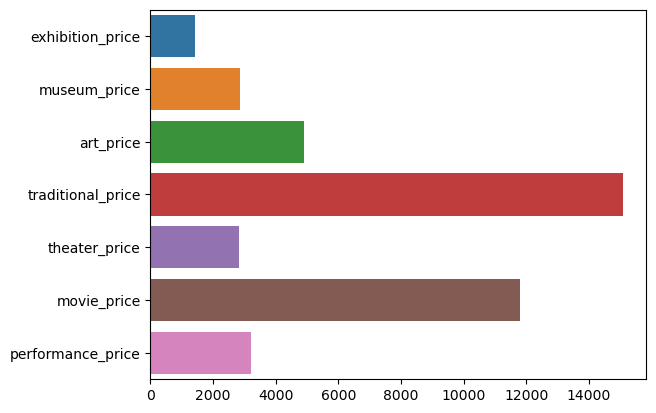

In [19]:
# 저소득층이 많이 소비하는 문화활동 분야
data = CA
data = data.fillna(0)
column = 'income'
data = data[data[column]==1].iloc[:, 6:13].mean(axis=0)
data.apply(int)

# 시각화
x = data.values
y = data.index

sns.barplot(x=x, y=y)
    
plt.show()

### 고소득층이 많이 소비하는 문화활동 분야
- 고소득층이면 문화예술활동을 많이 참여할 것이다.

exhibition_price     14910
museum_price         37371
art_price            48163
traditional_price    71594
theater_price        21742
movie_price          20188
performance_price    31872
dtype: int64

<Axes: >

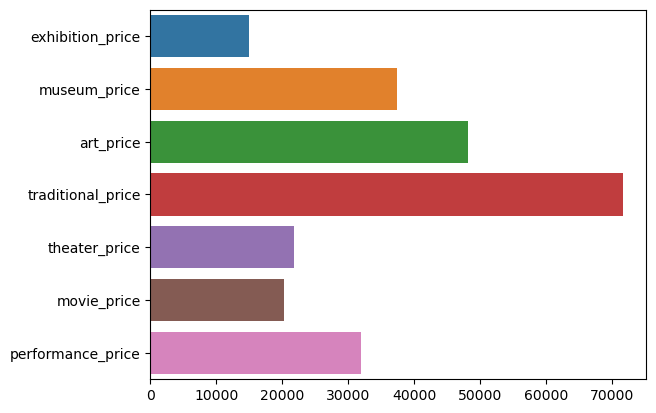

In [20]:
# 고소득층이 많이 소비하는 문화활동 분야
data = CA
data = data.fillna(0)
column = 'income'
data = data[data[column]==7].iloc[:, 6:13].mean(axis=0)
data.apply(int)

# 시각화
x = data.values
y = data.index

sns.barplot(x=x, y=y)
    
plt.show()

### 저/고소득층 비교

exhibition_price      1434
museum_price          2858
art_price             4890
traditional_price    15079
theater_price         2840
movie_price          11799
performance_price     3221
dtype: int64

[(0.0, 80000.0)]

exhibition_price     14910
museum_price         37371
art_price            48163
traditional_price    71594
theater_price        21742
movie_price          20188
performance_price    31872
dtype: int64

[(0.0, 80000.0)]

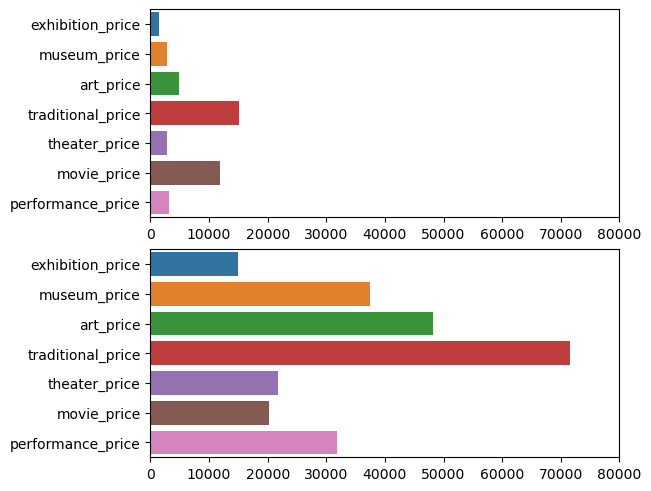

In [21]:
# 저/고소득층의 문화 활동 분야별 소비하는 금액
nrow = 2
ncol = 1

fig, axis = plt.subplots(nrow, ncol, constrained_layout=True)

data = CA
data = data.fillna(0)
column = 'income'
cond = (data[column] == 1), (data[column] == 7)

for i in range(nrow*ncol):
    data_sub = data[cond[i]].iloc[:, 6:13].mean(axis=0)
    data_sub.apply(int)
    x = data_sub.values
    y = data_sub.index

    s = sns.barplot(x=x, y=y, ax=axis[i])
    s.set(xlim=(0, 80000))

plt.show()

# 전체적으로 고소득층이 문화예술행사에 더 많이 소비한다.

exhibition_price      1434
museum_price          2858
art_price             4890
traditional_price    15079
theater_price         2840
movie_price          11799
performance_price     3221
dtype: int64

[(0.0, 0.4)]

exhibition_price     14910
museum_price         37371
art_price            48163
traditional_price    71594
theater_price        21742
movie_price          20188
performance_price    31872
dtype: int64

[(0.0, 0.4)]

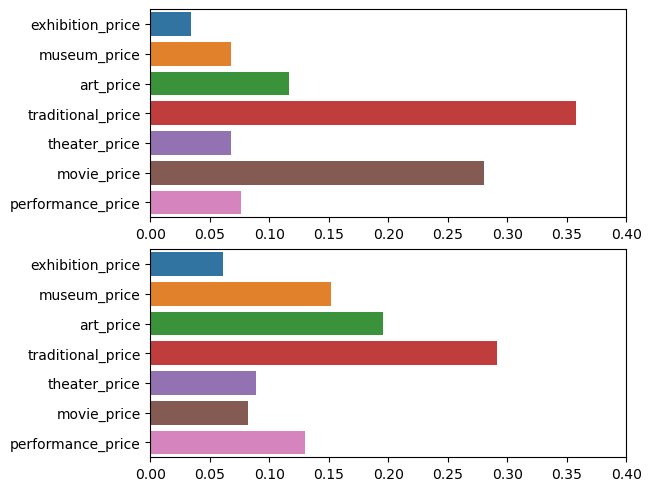

In [22]:
# 저/고소득층의 문화 활동 분야별 소비하는 금액 비율
nrow = 2
ncol = 1

fig, axis = plt.subplots(nrow, ncol, constrained_layout=True)

data = CA
data = data.fillna(0)
column = 'income'
cond = (data[column] == 1), (data[column] == 7)

for i in range(nrow*ncol):
    data_sub = data[cond[i]].iloc[:, 6:13].mean(axis=0)
    data_sub.apply(int)
    x = data_sub.values/data_sub.values.sum()
    y = data_sub.index

    s = sns.barplot(x=x, y=y, ax=axis[i])
    s.set(xlim=(0, 0.40))

plt.show()

# 저소득층은 영화 관람에 소비하는 비율이 높다.

<Axes: >

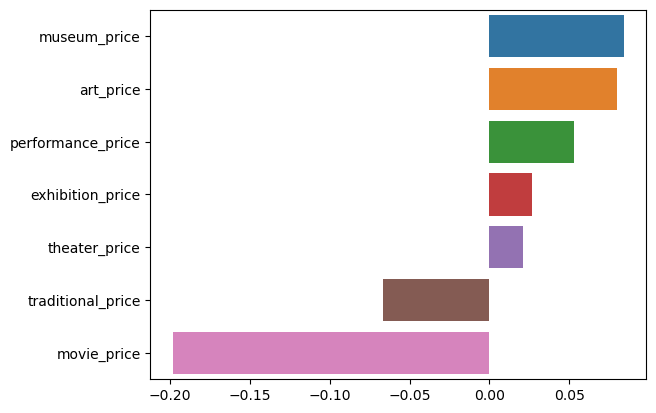

In [23]:
# 저소득층과 고소득층의 문화 활동 분야별 소비하는 금액 비율의 차이
data = CA
data = data.fillna(0)
column = 'income'
cond = (data[column] == 1), (data[column] == 7)


a = data[cond[0]].iloc[:, 6:13].mean(axis=0) / data[cond[0]].iloc[:, 6:13].mean(axis=0).sum()
b = data[cond[1]].iloc[:, 6:13].mean(axis=0) / data[cond[1]].iloc[:, 6:13].mean(axis=0).sum()
temp = (b-a).sort_values(ascending=False)

sns.barplot(x=temp.values, y=temp.index)

# 위쪽으로 갈수록 고소득층이 많이 소비하는 분야
# 아래쪽으로 갈수록 저소득층이 많이 소비하는 분야
# 시니어의 경우, 저소득층일수록 문화예술활동에 적게 참여하는 것으로 예측됨.
# 영화는 비용 및 접근성 면에서 저소득층이 접하기 쉽다.
# 박물관, 음악 및 무용 발표회는 비용 및 접근성 면에서 저소득층이 접하기 어렵다.
# ~~~
# 최우선적으로 5~60대 저소득층에게 박물관 관람과 음악 및 무용 발표회 관람에 먼저 지원해야 한다.
# 다만, 지원하는 방향을 무조건적인 금전 지원뿐만 아니라 정보를 주는 식의 지원이 필요하다.

- 머신러닝 설명할 때 생각 과정
target이 1인 경우, 저소득층이 많음

total_price의 평균이 a이다

target이 3인 경우, 고소득층이 많음

total_price의 평균이 b이다

두 수치 비교



저소득층인 경우 -> target이 1일 것이다

어느 분야에 돈을 많이 쓰는가? 얼마나 쓰는가?

고소득층인 경우 -> target이 3일 것이다

어느 분야에 돈을 많이 쓰는가? 얼마나 쓰는가?



=> 저소득층이 문화 소비 소외층임

어떤 분야에 지원을 해야하는지 알 수 있음